# Exam 4th of January 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="0019-BYZ"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_inversion` in order to produce samples from the below distribution using rejection sampling:

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-1}{e-1}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$

2. [2p] Produce 100000 samples (**use fewer if it times-out and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. *(There is a timeout decorator on this function and if it takes more than 10 seconds to generate 100000 samples it will timeout and it will count as if you failed to generate.)*
3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2e^{x^2} x}{e-1} dx
$$
and store the result in `problem1_integral`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Fill in the remaining part of the function `problem1_inversion_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

In [2]:

# Part 1

from Utils import timeout
import random
@timeout()
def problem1_inversion(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections
    answer = [ ]
    for t in range(n_samples):
        y = random.random()
        if y <= 0:
            x = 0
            answer.append(x)
        elif y < 1 and y > 0:
            x = (np.exp(y ** 2) - 1 )/(np.exp(1) - 1)
            answer.append(x)
        else:
            x = 1
            answer.apppend(x)
    # Return a numpy array of length n_samples
    return np.asarray(answer)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


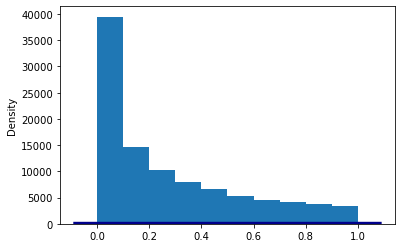

In [3]:
# Part 2
import numpy as np
problem1_samples = problem1_inversion(100000)
#print(problem1_samples)
#problem1_samplesdist =np.array(problem1_samples)
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(problem1_samples)
sns.distplot(problem1_samples, hist=True, kde=True, 
             bins=int(100000/1000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()
#problem1_samples

In [4]:
# Part 3
import math
import numpy as np
def MC(samples,n_samples): 
    integral_value = 0
    for i in range(n_samples):
        x = samples[i]
        integral_value = integral_value + (1-0)*(math.sin(x) * 2 * np.exp(x**2)*x )/(np.exp(1) -1)
    integral_value = integral_value/n_samples
    return integral_value
problem1_integral = MC(problem1_samples,len(problem1_samples))
print(problem1_integral)

0.27489750104546934


In [5]:
# Part 4
from numpy import *
def hoeffding_interval(sample_mean, n, a, b, confidence_level=0.95):
    epsilon = np.sqrt(np.log(2 / (1 - confidence_level)) / (2 * n))
    return max(a, sample_mean - epsilon * (b - a)), min(b, sample_mean + epsilon * (b - a))
problem1_samples_avg = np.mean(problem1_samples)
n = len(problem1_samples)
a = 0.0 
b = 1.0
problem1_interval = hoeffding_interval(problem1_samples_avg,n,a,b)
problem1_interval

(0.2661408288436799, 0.2747302170106147)

In [6]:
# Part 5
import random
import numpy as np
def problem1_inversion_2(n_samples=1):
    # Distribution from part 2
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections
    samples = [ ]
    for t in range(n_samples):
        y = random.random()
        if y <= 0:
            x = 0
            samples.append(x)
        elif y > 0 and y < 1/20:
            x = 20 * x * np.exp(20- 1/x )
            samples.append(x)
        else:
            x = 1
            samples.append(x)
    # Return a numpy array of length n_samples
    return np.asarray(samples)

---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.

In [7]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_integral, float)) 
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Good, your problem1_inversion_2 returns a numpy array


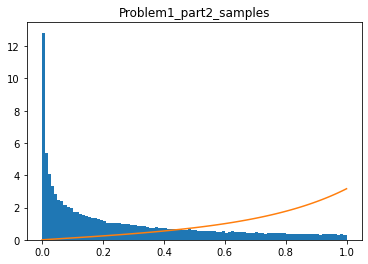

Beginning tests for problem 1

---------------------------------
Beginning test for part1
---------------------------------

-----Beginning test------
You are producing the correct number of samples when asking for 10
-----Ending test---------

-----Beginning test------

Your sampler produces samples that are too far away from the true distribution
You got 3.0 points deduction 
-----Ending test---------

Manual points: 0
No comment!
---------------------------------
Beginning test for part2
---------------------------------

-----Beginning test------
You produced 100000 samples, good!
-----Ending test---------

-----Beginning test------

Your samples are too far away from the true distribution
You got 0.5 points deduction 
-----Ending test---------

Manual points: -1
No comment!
---------------------------------
Beginning test for part3
---------------------------------

-----Beginning test------

Your answer to problem1_integral is not within 0.01 from the correct approximation
You go

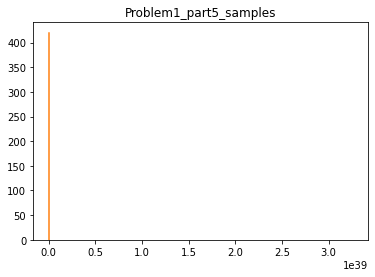

---
## Exam vB, PROBLEM 2
Maximum Points = 13


Let us build a proportional model ($\mathbb{P}(Y=1 \mid X) = G(\beta_0+\beta \cdot X)$ where $G$ is the logistic function) for the spam vs not spam data. Here we assume that the features are presence vs not presence of a word, let $X_1,X_2,X_3$ denote the presence (1) or absence (0) of the words $("free", "prize", "win")$.

1. [2p] Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has shape (n_emails,3) where each feature in `problem2_X` corresponds to $X_1,X_2,X_3$ from above, `problem2_Y` which has shape **(n_emails,)** and consists of a $1$ if the email is spam and $0$ if it is not. Split this data into a train-calibration-test sets where we have the split $40\%$, $20\%$, $40\%$, put this data in the designated variables in the code cell.

2. [4p] Follow the calculation from the lecture notes where we derive the logistic regression and implement the final loss function inside the class `ProportionalSpam`. You can use the `Test` cell to check that it gives the correct value for a test-point.

3. [4p] Train the model `problem2_ps` on the training data. The goal is to calibrate the probabilities output from the model. Start by creating a new variable `problem2_X_pred` (shape `(n_samples,1)`) which consists of the predictions of `problem2_ps` on the calibration dataset. Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`, store this trained model in `problem2_calibrator`.

4. [3p] Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make final predictions on the testing data, store the prediction in `problem2_final_predictions`. Compute the $0-1$ test-loss and store it in `problem2_01_loss` and provide a $99\%$ confidence interval of it, store this in the variable `problem2_interval`, this should again be a tuple as in **problem1**.

In [9]:
# Part 1
def load_sms():
    import csv
    lines = []
    hamspam = {'ham': 0, 'spam': 1}
    with open('data/spam.csv', mode='r',encoding='latin-1') as f:
        reader = csv.reader(f)
        header = next(reader)
        lines = [(line[1],hamspam[line[0]]) for line in reader]
        
    return lines
spam_no_spam = load_sms()
#print(spam_no_spam)
x1 = [ ]
x2 = [ ]
x3 = [ ]
def getx(dataset,keyword):
    x = []

    for sms, is_spam in dataset:
        # Splitting the SMS into words
        words = sms.lower().split()
        # Check if 'free' or 'prize' are present as complete words
        has_keywords = keyword in words


        if has_keywords:
            x.append('1')
        else:
            x.append('0')
    return x
x1 = getx(spam_no_spam,"free")
x2 = getx(spam_no_spam,"prize")
x3 = getx(spam_no_spam,"win")
#problem2_X = np.array([x1,x2,x3])
problem2_X = np.array([x1,x2,x3],dtype='int') # Teacher edit: you need to convert everything from string to numbers
problem2_X = problem2_X.transpose()
def getY(dataset):
    y = [ ]
    for sms, is_spam in dataset:
        if is_spam:
            y.append('1')
        else:
            y.append('0')
    return y
Y = getY(spam_no_spam)
#Y = np.array(Y) 
Y = np.array(Y,dtype='int') # Teacher edit: you need to convert everything from string to numbers
problem2_Y = Y
#print(problem2_X.shape)
#print(problem2_Y.shape)
def train_test_validation(X,Y,test_size=0.2,validation_size=0.2,random_state=None,shuffle=True):
    """
    Performs a train test validation split of the data [train_data,test_data,validation_data]

    Parameters:
    -----------
    X : The input X, shape (n_samples,n_features)
    Y : The input labells, shape (n_samples)
    test_size : the proportion of data that should be test data
    validation_size : the proportion of data that should be validation data
    random_state : the random state variable passed through to sklearns train_test_split

    Returns:
    ----------
    X_train, X_test, X_valid, Y_train, Y_test, Y_valid

    Examples:
    ----------
    >>> X_train, X_test, X_valid, Y_train, Y_test, Y_valid = train_test_validation(X,Y,test_size=0.25,validation_size=0.25)
    """
    from sklearn.model_selection import train_test_split

    X_train,X_tt,Y_train,Y_tt = train_test_split(X,Y,
                                                 test_size=test_size+validation_size,
                                                 random_state=random_state,
                                                 shuffle=shuffle)
    X_test,X_valid,Y_test,Y_valid = train_test_split(X_tt,Y_tt,
                                                     test_size=(validation_size)/(test_size + validation_size),
                                                     random_state=random_state,
                                                     shuffle=shuffle)

    return X_train, X_test, X_valid, Y_train, Y_test, Y_valid

#problem2_X_train = XXX
#problem2_X_calib = XXX
#problem2_X_test = XXX

#problem2_Y_train = XXX
#problem2_Y_calib = XXX
#problem2_Y_test = XXX
problem2_X_train,problem2_X_test,problem2_X_calib,problem2_Y_train,problem2_Y_test,problem2_Y_calib = train_test_validation(problem2_X,problem2_Y,test_size = 0.4,validation_size = 0.2)
print(problem2_X_train.shape,problem2_X_calib.shape,problem2_X_test.shape,problem2_Y_train.shape,problem2_Y_calib.shape,problem2_Y_test.shape)


(2228, 3) (1115, 3) (2229, 3) (2228,) (1115,) (2229,)


In [10]:
# Part 2

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        #cost = np.transpose(-y)@np.log(h) - np.transpose(1-y)@np.log(1-h) + (l/2)*np.transpose(t[1:])@t[1:]
        #cost = (1/m)*cost
        #return cost
        y_hat = self.predict(X) # Teacher: this is not correct and predict wont work since the model is not trained
        # Teacher: since it is not trained y_hat will be None and everything fails
        return 0 # Teacher edit: to make the code run
        #lossvalue = -np.mean(Y*np.log(y_hat) + (1- Y )*np.log(1-y_hat))
        #return lossvalue

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 # This rounding is to help you with the calibration


In [11]:
# Part 3

problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train,problem2_Y_train)
problem2_X_pred = problem2_ps.predict(problem2_X_calib)


#train DecisonTreeRegressor
from sklearn.tree import DecisionTreeRegressor
problem2_calibrator = DecisionTreeRegressor()
problem2_calibrator.fit(problem2_X_train,problem2_Y_train)
DecisionTreeRegressorproblem2_X_pred = problem2_calibrator.predict(problem2_X_calib)
#print(DecisionTreeRegressorproblem2_X_pred.shape)

In [12]:
# Part 4
import numpy as np
# These are the predicted probabilities
problem2_final_predictions = problem2_calibrator.predict(problem2_X_test)


# In order to compute this loss we first need to convert the predicted probabilities to a decision
# recall the Bayes classifier?
problem2_01_loss = (problem2_final_predictions - problem2_Y_test).sum()

# Recall the interval is given as a tuple (a,b) or a list [a,b]
def hoeffding_interval(sample_mean, n, a, b, confidence_level=0.95):
    epsilon = np.sqrt(np.log(2 / (1 - confidence_level)) / (2 * n))
    return max(a, sample_mean - epsilon * (b - a)), min(b, sample_mean + epsilon * (b - a))
sa_avg = np.mean(problem2_final_predictions)
n = len(problem2_final_predictions)
a = 0.0
b = 1.0 
problem2_interval = hoeffding_interval(sa_avg,n,a,b)

---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.

In [13]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

Your loss was not correct on a test point


Beginning tests for problem 2

---------------------------------
Beginning test for part1
---------------------------------

-----Beginning test------
problem2_X has the correct shape
-----Ending test---------

-----Beginning test------
problem2_Y has the correct shape
-----Ending test---------

-----Beginning test------
problem2_X_train has the correct number of features
-----Ending test---------

-----Beginning test------
problem2_X_calib has the correct number of features
-----Ending test---------

-----Beginning test------
problem2_X_test has the correct number of features
-----Ending test---------

-----Beginning test------
problem2_Y_train has the correct shape
-----Ending test---------

-----Beginning test------
problem2_Y_calib has the correct shape
-----Ending test---------

-----Beginning test------
problem2_Y_test has the correct shape
-----Ending test---------

Manual points: 0
Your problem2_X and problem2_Y where arrays of strings, not particularly useful. I changed it to 

---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following four Markov chains, answer each question for all chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>
<img width="400px" src="pictures/MarkovC.png">Markov chain C</img>
<img width="400px" src="pictures/MarkovD.png">Markov chain D</img>

1. [2p] What is the transition matrix?
2. [2p] Is the Markov chain irreducible?
3. [3p] Is the Markov chain aperiodic? What is the period for each state?
4. [3p] Does the Markov chain have a stationary distribution, and if so, what is it?
5. [3p] Is the Markov chain reversible?

In [15]:
# PART 1

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)
import numpy as np

problem3_A = np.array([[0.8, 0.2, 0.0, 0.0],
              [0.6, 0.2, 0.2, 0.0],
              [0.0, 0.4, 0.0, 0.6],
              [0.0, 0.0, 0.8, 0.2]])
problem3_B   = np.array([[0.0,0.2,0.0,0.8],
                          [0.0,0.0,1.0,0.0],
                          [0.0,1.0,0.0,0.0],
                          [0.5,0.0,0.5,0.0]])
problem3_C   = np.array([[0.2,0.3,0.0,0.0,0.5],
                          [0.2,0.2,0.6,0.0,0.0],
                          [0.0,0.4,0.0,0.6,0.0],
                          [0.0,0.0,0.0,0.6,0.4],
                          [0.0,0.0,0.0,0.4,0.6]])
problem3_D   = np.array([[0.8,0.2,0.0,0.0],
                          [0.6,0.2,0.2,0.0],
                          [0.0,0.4,0.0,0.6],
                          [0.1,0.0,0.7,0.2]])

In [16]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False
'''Irreducibility: a Markov chain is irreducible if its state space has only one connected class, 
i.e., the full membership of the state space,
and the irreducibility of a Markov chain implies 
that the random variable can be transferred between any states during its evolution .'''
problem3_A_irreducible = True
problem3_B_irreducible = False
problem3_C_irreducible = True
problem3_D_irreducible = True


In [17]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False
'''Non-periodic: an MC,there does not exist a state from which the length of time elapsed 
before returning to this state is periodic, 
Theorem: Irreducible and non-periodic finite state Markov chains with a unique smooth distribution.'''
problem3_A_is_aperiodic = True
problem3_B_is_aperiodic = False
problem3_C_is_aperiodic = False
problem3_D_is_aperiodic = True

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = np.array([1,1,1,1])
problem3_B_periods = np.array([1,1,1,1])
problem3_C_periods = np.array([2,2,1,2,2])
problem3_D_periods = np.array([2,2,2,2])
#print(problem3_A_periods.shape)
#print(problem3_B_periods.shape)
#print(problem3_C_periods.shape)
#print(problem3_D_periods.shape)

In [18]:
# PART 4
import numpy as np
def getstationary(P):
    eigenvalues, eigenvectors = np.linalg.eig(P.T)  
    stationary_distribution = np.real(eigenvectors[:, 0] / eigenvectors[:, 0].sum()) 
    answer_stationary = stationary_distribution
    return answer_stationary
def isver(P):
    isnotinverse = 0
    inverse =  1
    import numpy as np
    if np.linalg.det(P) == 0:
        return isnotinverse
    else:
        return inverse
#------------------------STATIONARY DISTRIBUTION-----------------
# Answer each one with a True or False
#A = isver(problem3_D)
problem3_A_has_stationary = True
problem3_B_has_stationary = True
problem3_C_has_stationary = True
problem3_D_has_stationary = True

# Answer the following with the stationary distribution as a numpy array of shape (n_states,)
# if the Markov chain has a stationary distribution otherwise answer with False
#A = 
problem3_A_stationary_dist = getstationary(problem3_A)
problem3_B_stationary_dist = getstationary(problem3_B)
problem3_C_stationary_dist = getstationary(problem3_C)
problem3_D_stationary_dist = getstationary(problem3_D)

#print(problem3_A_stationary_dist.shape)
#print(problem3_B_stationary_dist.shape)
#print(problem3_C_stationary_dist.shape)
#print(problem3_D_stationary_dist.shape)

In [19]:
# PART 5
#------------------------REVERSIBLE-----------------
# Answer each one with a True or False
'''The reversibility of a Markov chain is a stricter form of irreducibility,
i.e., it not only transfers between arbitrary states, but also transfers to each state with equal probability, 
so that a reversible Markov chain is a sufficient non-necessary condition for a smooth Markov chain.'''
problem3_A_is_reversible = False
problem3_B_is_reversible = False
problem3_C_is_reversible = False
problem3_D_is_reversible = False

Beginning tests for problem 3

---------------------------------
Beginning test for part1
---------------------------------

-----Beginning test------
You get a deduction for each mistake in the transition matrix_A: deduced_points 0.00
-----Ending test---------

-----Beginning test------
You get a deduction for each mistake in the transition matrix_B: deduced_points 0.00
-----Ending test---------

-----Beginning test------
You get a deduction for each mistake in the transition matrix_C: deduced_points 0.00
-----Ending test---------

-----Beginning test------
You get a deduction for each mistake in the transition matrix_D: deduced_points 0.00
-----Ending test---------

Manual points: 0
No comment!
---------------------------------
Beginning test for part2
---------------------------------

-----Beginning test------
Correct answer for Markov chain_A
-----Ending test---------

-----Beginning test------
Correct answer for Markov chain_B
-----Ending test---------

-----Beginning test------
